# Dark Energy $c_s^2$ data analysis
Author: João Victor Rebouças, May 2025

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = "stix"
mpl.rcParams['font.family'] = "STIXGeneral"


In [ ]:
# Load chains
indices = range(3, 5)
settings = {
    "ignore_rows": 0.4,
}
chains = {}
for i in indices:
    chain = getdist.loadMCSamples(f"../chains/MCMC{i}/MCMC{i}", settings=settings)
    chain.paramNames.parWithName("log10_cs2_0").label = r"\log_{10}(c_{s,0}^2)"
    chains[i] = chain

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_44833/60897085.py:9: SyntaxWarning: invalid escape sequence '\l'
  chain.paramNames.parWithName("log10_cs2_0").label = "\log_{10}(c_{s,0}^2)"


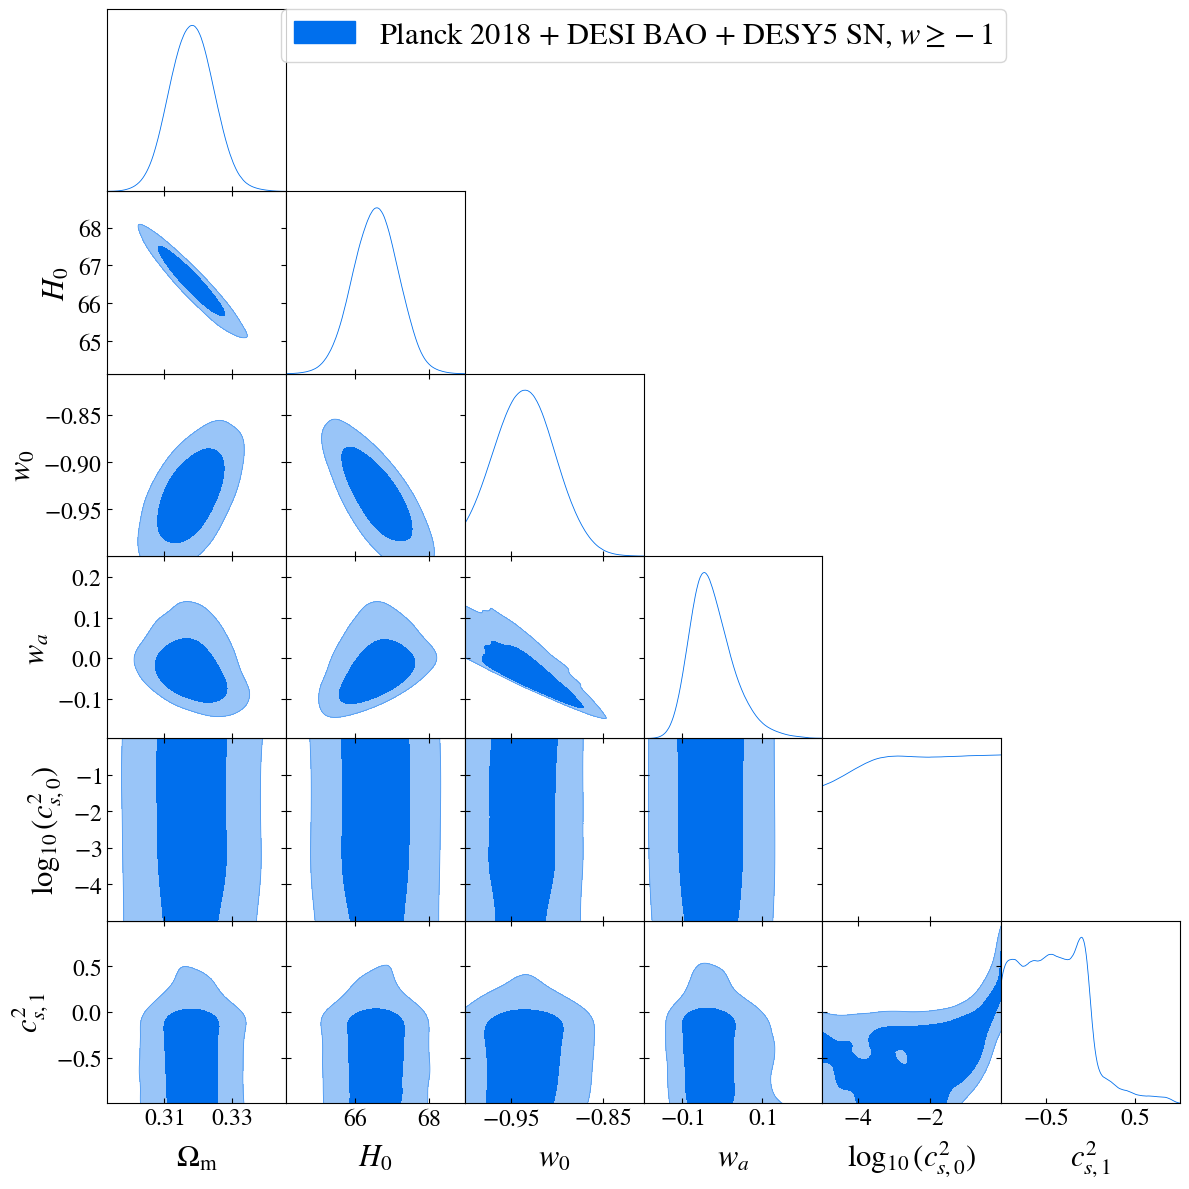

In [21]:
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=20
p.settings.axes_labelsize=25
p.settings.legend_fontsize=25
p.triangle_plot(
    chains[3],
    ["omegam", "H0", "w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=True,
    legend_labels=[r"Planck 2018 + DESI BAO + DESY5 SN, $w \geq -1$"]
)
p.export("plots/w0wacs2_quint_pbs.pdf")

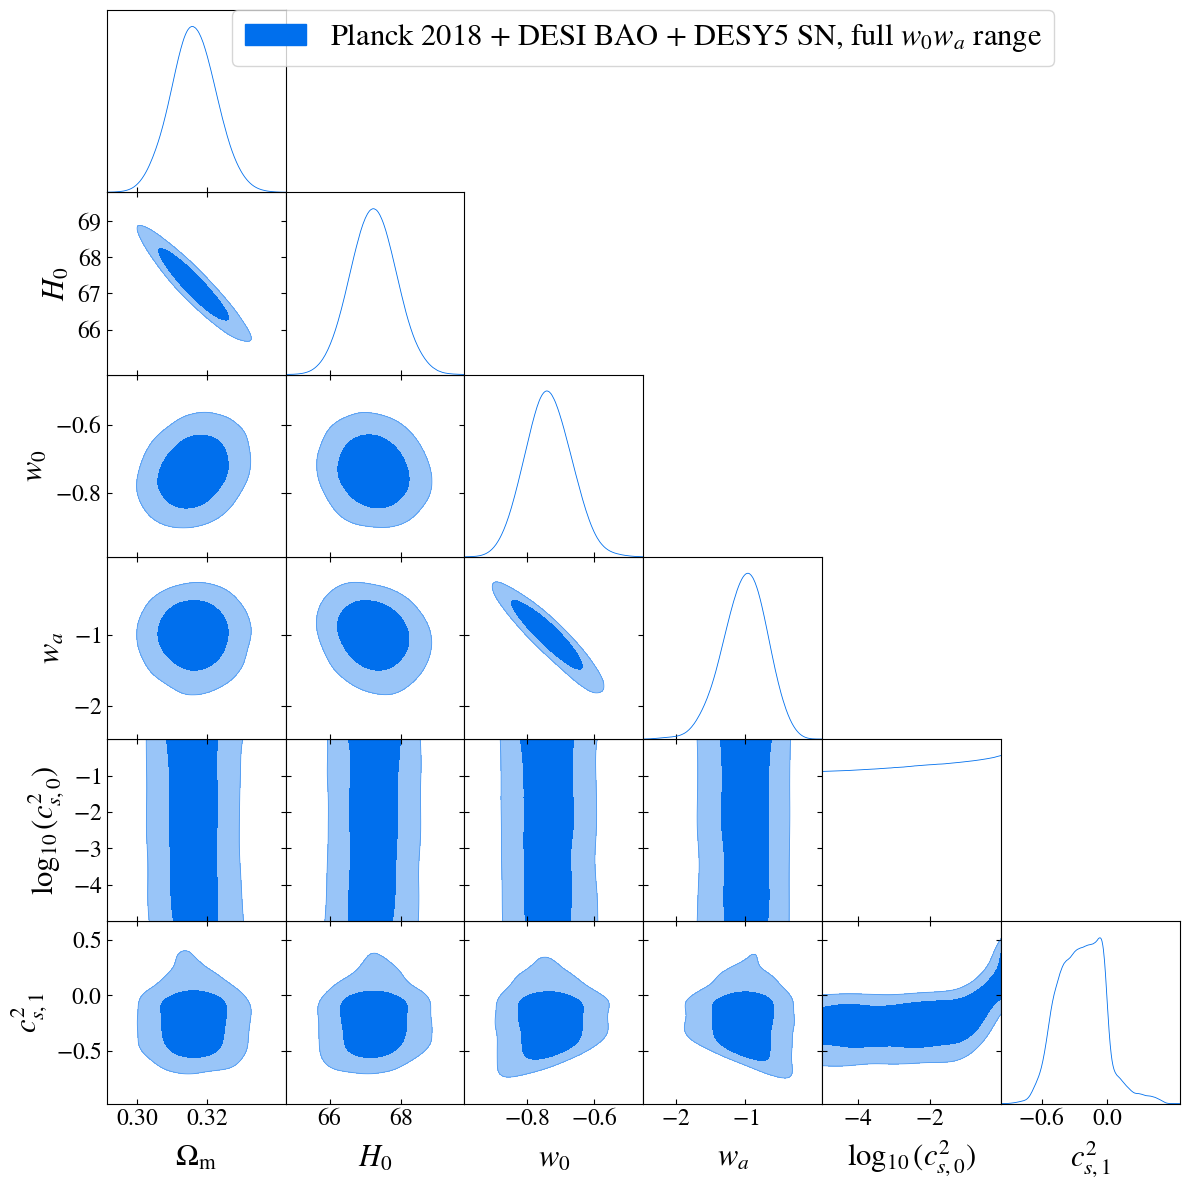

In [22]:
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=20
p.settings.axes_labelsize=25
p.settings.legend_fontsize=25
p.triangle_plot(
    chains[4],
    ["omegam", "H0", "w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=True,
    legend_labels=[r"Planck 2018 + DESI BAO + DESY5 SN, full $w_0w_a$ range"]
)
p.export("plots/w0wacs2_pbs.pdf")